# Project Objective

To analyze factors influencing bank loan approval decisions using customer demographic and financial data. The goal is to identify key variables that impact approval outcomes, uncover data-driven patterns, and provide actionable insights to help improve the bank’s risk assessment and loan approval strategy.

## Step 1 — Import & Load Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Loan Predication.csv')

In [21]:
df.shape

(614, 13)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Step 2 — Data Cleaning

In [27]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [41]:
df['Dependents'] = df['Dependents'].replace("3+",3).astype(float).astype('Int64')

In [43]:
df['Dependents'].unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [49]:
df['Dependents'].isna().sum()

15

In [51]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [57]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [81]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [83]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [87]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\1821425727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace = True)


In [89]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df['Dependents'].unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [93]:
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)

C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\4127822517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].median(), inplace = True)


In [95]:
df['Dependents'].unique()

<IntegerArray>
[0, 1, 2, 3]
Length: 4, dtype: Int64

In [97]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [99]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\4175059458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)


In [101]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

<Axes: ylabel='LoanAmount'>

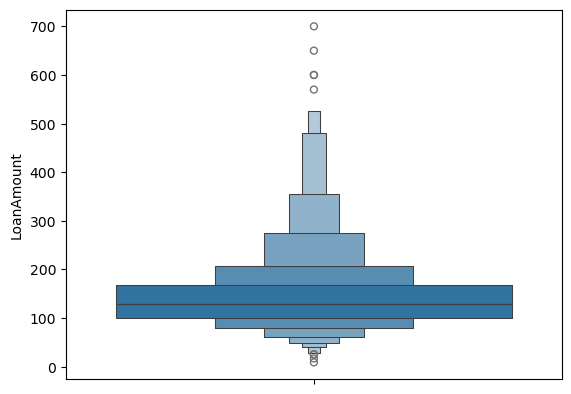

In [125]:
sns.boxenplot(df['LoanAmount'])

In [129]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)
# Here we use median becs there are few outliers and if we use mean so there are chances of getting big numbers

In [149]:
df['LoanAmount'].value_counts

<bound method IndexOpsMixin.value_counts of 0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64>

In [133]:
df['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [137]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [141]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: ylabel='Loan_Amount_Term'>

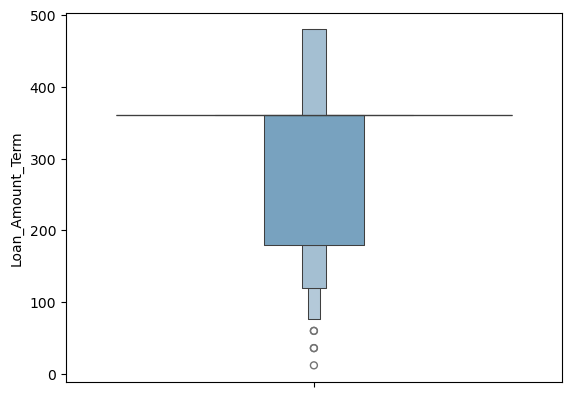

In [139]:
sns.boxenplot(df['Loan_Amount_Term'])

In [143]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)  # we hae use mode becs there are few numbers and if we use mdeian so there are chances to get higher numbers

C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\556479640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)


In [145]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [151]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [157]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True) 

C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\633808602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)


In [159]:
df['Credit_History'].unique()

array([1., 0.])

In [174]:
(df==0).sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           360
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
Total_Income           0
dtype: Int64

## Step 3 — Feature Engineering

In [168]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [170]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [176]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [178]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667


In [204]:
df['Income_Category'] = pd.qcut(df['Total_Income'], q=3, labels= ['Low', 'Medium','High'])

In [208]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Income_Category
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,1442.0,0.097222,Low
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y,3166.0,0.100000,Low
74,LP001253,Male,Yes,3,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y,7040.0,0.519444,High
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,11179.0,0.555556,High
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y,4567.0,0.319444,Low
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0,0.438889,Medium
461,LP002484,Male,Yes,3,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y,7740.0,0.711111,High
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N,6085.0,0.333333,Medium
457,LP002467,Male,Yes,0,Graduate,No,3708,2569.0,173.0,360.0,1.0,Urban,N,6277.0,0.480556,Medium
11,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.0,360.0,1.0,Urban,Y,4340.0,0.302778,Low


## Step 4 — Exploratory Data Analysis (EDA)

#### 
What percentage of loans are approved vs. not approved?

Does gender, education, or marital status affect approval rate?

How does credit history relate to approval?

What’s the average income and loan amount of approved applicants?

Which property area has the highest approval rate?

In [ ]:
Percentage_Loans = df['Loan_Status'].value_counts


In [215]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [251]:
df['Loan_Status_Label'] = df['Loan_Status'].map({'Y' : 'Approved', 'N' : 'Not Approved'})
df['Loan_Status_Label'] 

0          Approved
1      Not Approved
2          Approved
3          Approved
4          Approved
           ...     
609        Approved
610        Approved
611        Approved
612        Approved
613    Not Approved
Name: Loan_Status_Label, Length: 614, dtype: object

In [253]:
Approval_Rate = df['Loan_Status_Label'].value_counts(normalize=True) * 100
print(Approval_Rate)

Loan_Status_Label
Approved        68.729642
Not Approved    31.270358
Name: proportion, dtype: float64


<Axes: ylabel='count'>

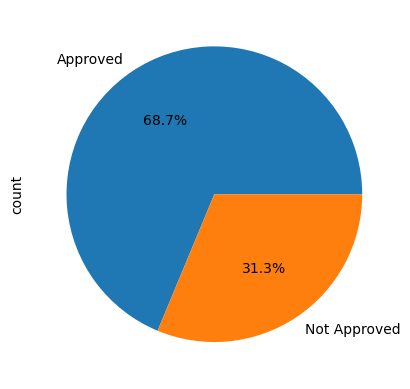

In [227]:
df['Loan_Status_Label'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

In [290]:
gender_affect = pd.crosstab(df['Gender'], df['Loan_Status_Label'], normalize='index') * 100
gender_affect
# Use crosstab() → when comparing two categories.

# Use groupby() → when doing calculation or summary for numeric values.

Loan_Status_Label,Approved,Not Approved
Gender,,
Female,66.964286,33.035714
Male,69.123506,30.876494


In [292]:
education_affect = pd.crosstab(df['Education'], df['Loan_Status_Label'], normalize='index') * 100
education_affect

Loan_Status_Label,Approved,Not Approved
Education,,
Graduate,70.833333,29.166667
Not Graduate,61.194030,38.805970


In [296]:
marital_status_effect =  pd.crosstab(df['Married'], df['Loan_Status_Label'], normalize='index') * 100
marital_status_effect

Loan_Status_Label,Approved,Not Approved
Married,,
No,62.910798,37.089202
Yes,71.820449,28.179551


In [318]:
Credit_History_effect =  pd.crosstab(df['Credit_History'], df['Loan_Status_Label'], normalize='index') * 100
Credit_History_effect
# We have use crosstab here becs we have 0,1 values in credit history

Loan_Status_Label,Approved,Not Approved
Credit_History,,
0.0,7.865169,92.134831
1.0,79.047619,20.952381


In [342]:
average_income_of_approved_applicants =  df.groupby('Loan_Status_Label')[['Total_Income','LoanAmount' ]].mean().reset_index()
average_income_of_approved_applicants

,Loan_Status_Label,Total_Income,LoanAmount
0,Approved,6888.585118,143.869668
1,Not Approved,7323.885417,149.890625


In [346]:
highest_property_rate_approval = pd.crosstab(df['Property_Area'], df['Loan_Status_Label'], normalize='index')*100 
highest_property_rate_approval

Loan_Status_Label,Approved,Not Approved
Property_Area,,
Rural,61.452514,38.547486
Semiurban,76.824034,23.175966
Urban,65.841584,34.158416


## Step 5 — Data Visualization
Step 5 — Data Visualization
Use matplotlib & seaborn to create:

Countplot: Loan approval by gender

Bar chart: Approval rate by property area

Boxplot: Loan amount vs. education

Histogram: Applicant income distribution

Heatmap: Correlation between numerical columns

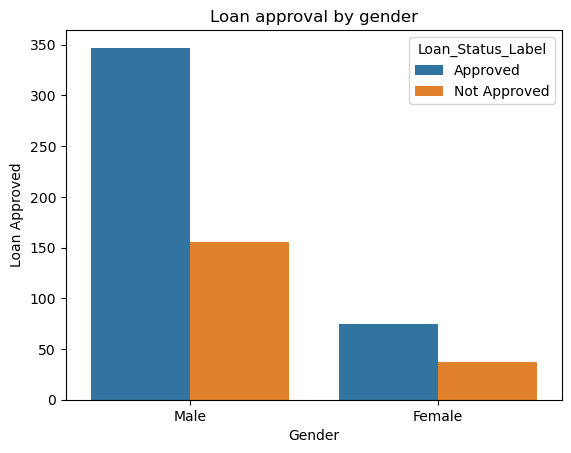

In [362]:
sns.countplot(data = df, x= 'Gender', hue = 'Loan_Status_Label')
plt.title("Loan approval by gender")
plt.xlabel("Gender")
plt.ylabel("Loan Approved")
plt.show()

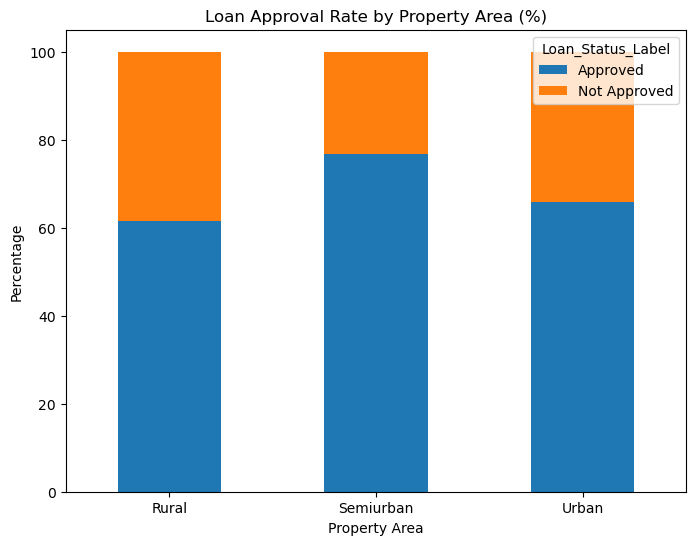

In [402]:
highest_property_rate_approval.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Loan Approval Rate by Property Area (%)")
plt.ylabel("Percentage")
plt.xlabel("Property Area")
plt.xticks(rotation=0)
plt.show()


C:\Users\SAIF\AppData\Local\Temp\ipykernel_6528\23384738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Education', y = 'LoanAmount', palette='Set2')


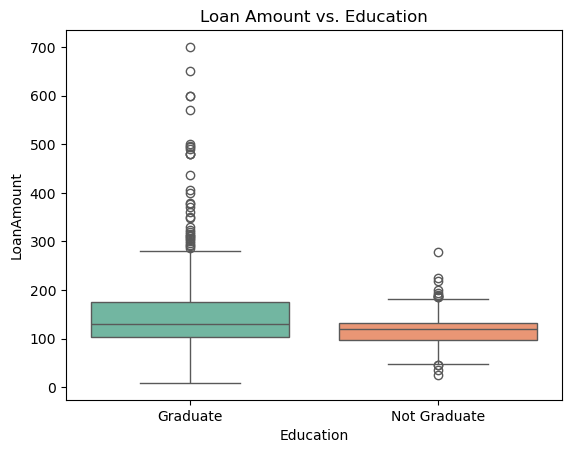

In [420]:
sns.boxplot(data = df, x = 'Education', y = 'LoanAmount', palette='Set2')
plt.title("Loan Amount vs. Education")
plt.xlabel = ('Education')
plt.ylabel = ('Loan Amount')
plt.show()

In [440]:
import matplotlib.pyplot as plt

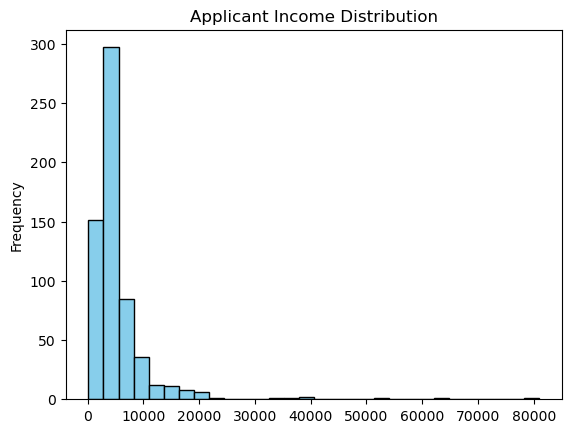

In [450]:
df['ApplicantIncome'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', title='Applicant Income Distribution')
plt.show()


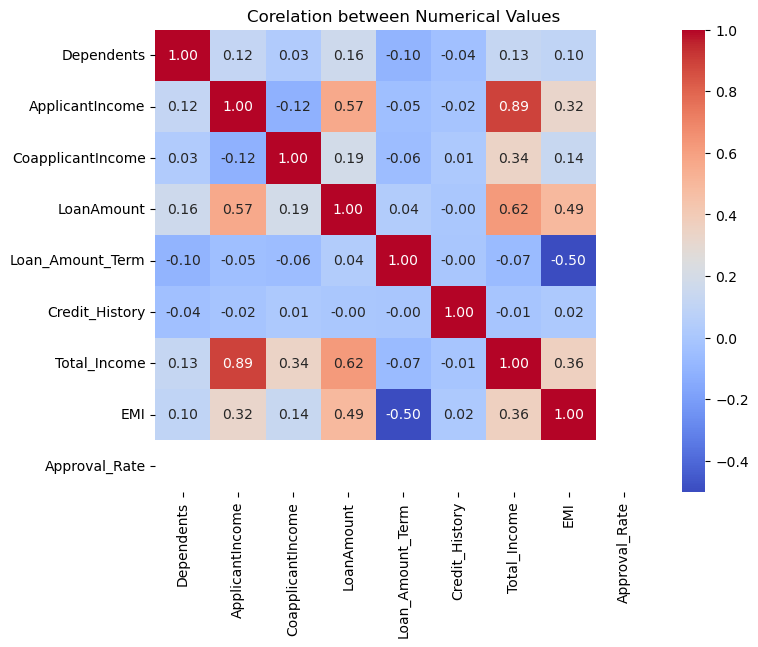

In [452]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix,annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Corelation between Numerical Values')
plt.show()

### 
1. Credit history is king. Applicants with a positive credit history are far more likely to be approved this single feature explains a large part of the approval decision.

2. Income matters, but total income matters more. Combining applicant and co-applicant income (Total_Income) shows that households with higher combined income get approved more often, even if the applicant’s solo income is modest.

3. Self-employed applicants face headwinds. Self-employed applicants tend to request larger loans and have slightly lower approval rates, which suggests the bank treats their income as less stable.

4. Loan size and term interact. Larger loan amounts or unusually long terms tend to lower approval probability unless supported by strong income and credit history.

5. Location adds nuance. Approval rates vary by property area — urban/semi-urban applicants get approved at different rates than rural ones, pointing to either risk differences or policy/pricing differences by region.